In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Mubawab_Rental_Data_Transformed_&_Preprocessed.csv")
print("\n Total number of records: ", df.shape[0])



 Total number of records:  8801


In [3]:
df.head()

,Prix,Type De Bien,Surface,Nombre De Pièces,Nombre De Chambres,Nombre De Salles De Bain,Etat De Location,Étage,Jardin,Terrasse,...,Ville_agadir,Ville_bouskoura,Ville_casablanca,Ville_dar-bouazza,Ville_kénitra,Ville_marrakech,Ville_mohammedia,Ville_rabat,Ville_salé,Ville_tanger
0,4800.0,1,75.0,1.0,2.0,2.0,2.0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
1,600.0,1,111.0,2.0,2.0,2.0,2.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,4000.0,1,75.0,1.0,2.0,2.0,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4000.0,1,65.0,1.0,1.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4700.0,1,85.0,3.0,2.0,1.0,2.0,6,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Binary attributes Vizualisation

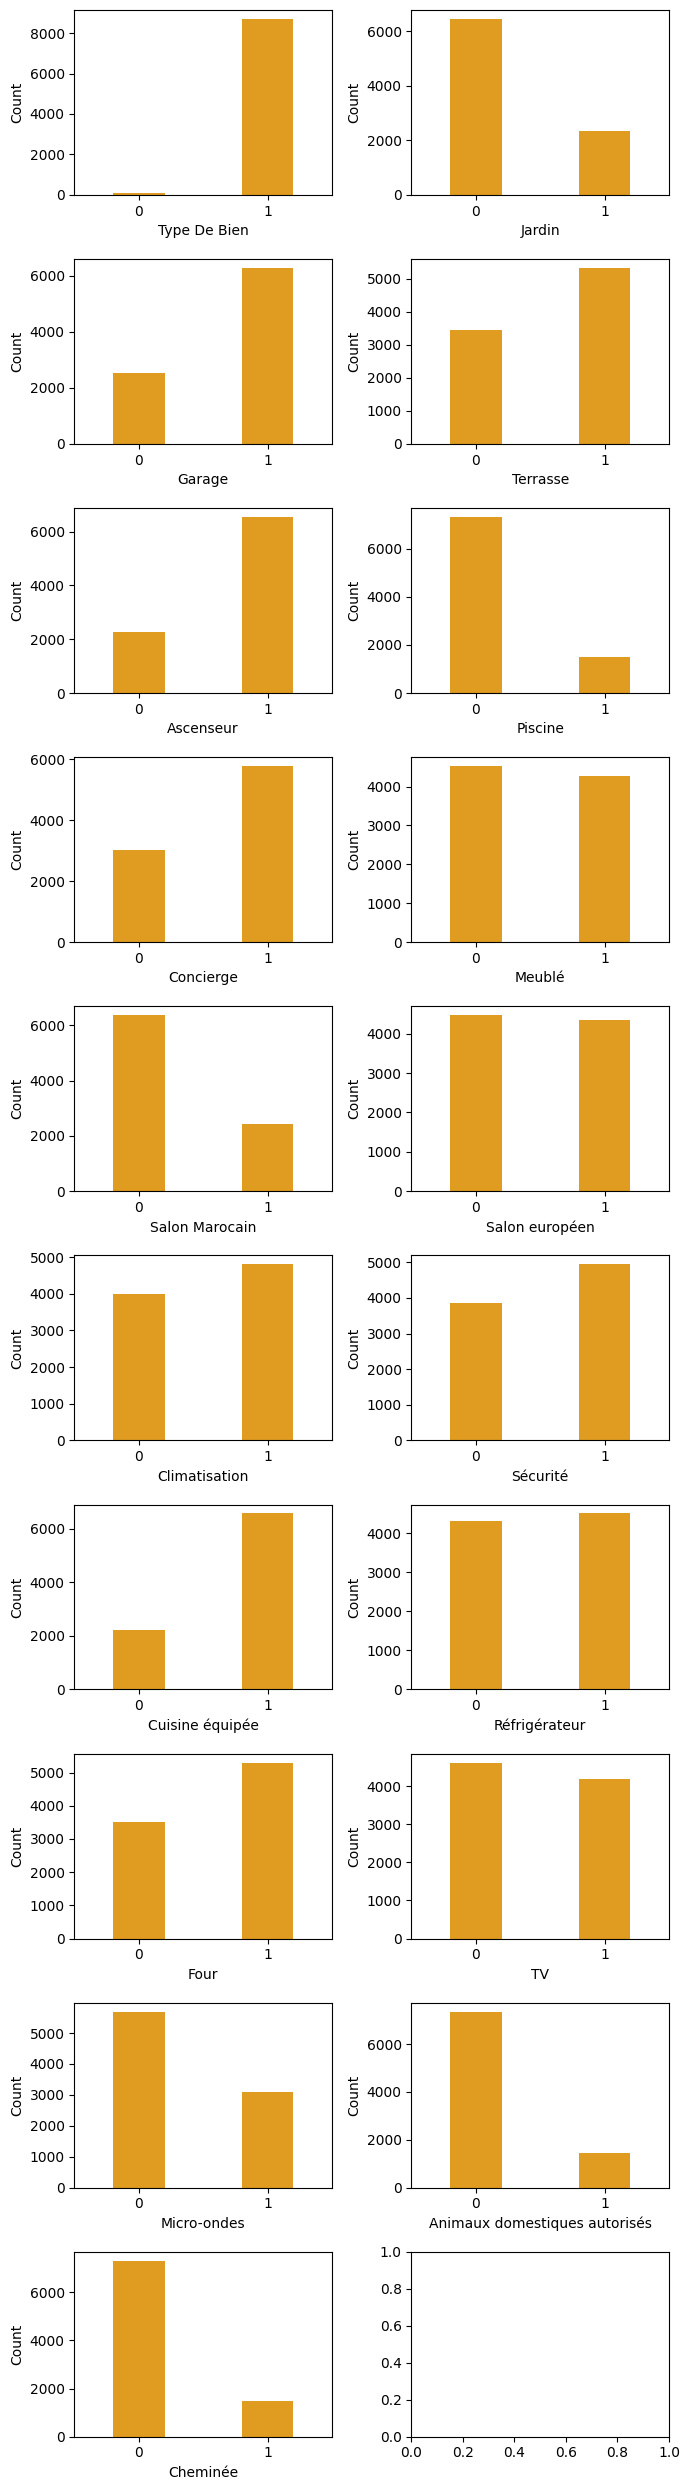

In [7]:
attrs = ["Type De Bien", "Jardin", "Garage", "Terrasse", "Ascenseur", "Piscine", "Concierge", "Meublé", "Salon Marocain", "Salon européen", "Climatisation", "Sécurité", "Cuisine équipée", "Réfrigérateur", "Four", "TV", "Micro-ondes", "Animaux domestiques autorisés", "Cheminée"]

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(7, 25))  

for i, feat in enumerate(attrs):
    sns.countplot(x=feat, data=df, ax=axes[i // 2, i % 2],width = 0.4, color='orange')
    axes[i // 2, i % 2].set_xlabel(feat)
    axes[i // 2, i % 2].set_ylabel('Count')

plt.tight_layout()
plt.show()


The imbalance in the 'Type De Bien' variable is not a significant concern for our regression problem. Primarily, this high imbalance exists solely within this variable, and given that we're dealing with a regression task rather than classification, its impact is expected to be minimal. Additionally, this variable isn't the primary predictor in our regression analysis.

#### Ordinal attributes Vizualisation

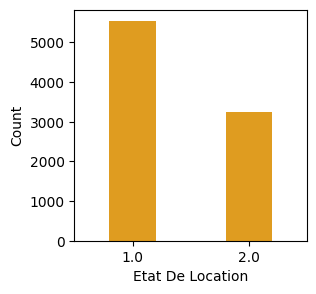

In [8]:
plt.figure(figsize=(3,3)) 
sns.countplot(x="Etat De Location", data=df, width = 0.4, color='orange')
plt.xlabel('Etat De Location')
plt.ylabel('Count')
plt.show()


#### Numerical attributes Vizualisation

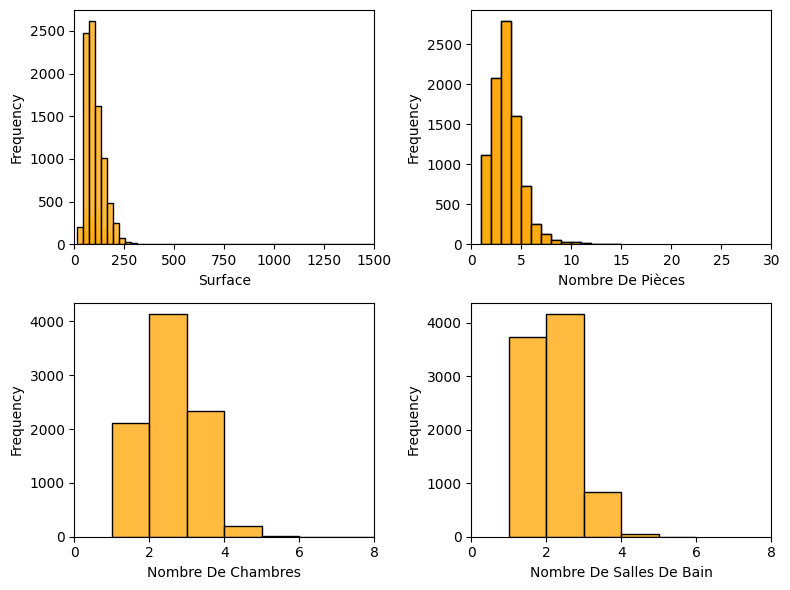

In [9]:
features2 = ["Surface", "Nombre De Pièces", "Nombre De Chambres", "Nombre De Salles De Bain"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, feat in enumerate(features2):
    sns.histplot(df[feat], binwidth=1, color='orange', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xlabel(feat)
    axes[i // 2, i % 2].set_ylabel('Frequency')
    axes[i // 2, i % 2].set_xlim(0, 8)  
    if feat == "Surface":
        sns.histplot(df[feat], binwidth=30, color='orange', ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_xlim(0, 1500)
    if feat == "Nombre De Pièces":
        sns.histplot(df[feat], binwidth=1, color='orange', ax=axes[i // 2, i % 2])
        axes[i // 2, i % 2].set_xlim(0, 30)
plt.tight_layout()
plt.show()


In [10]:
features2 = ["Prix", "Surface", "Nombre De Pièces", "Nombre De Chambres", "Nombre De Salles De Bain"]
new_df = df[features2].copy()


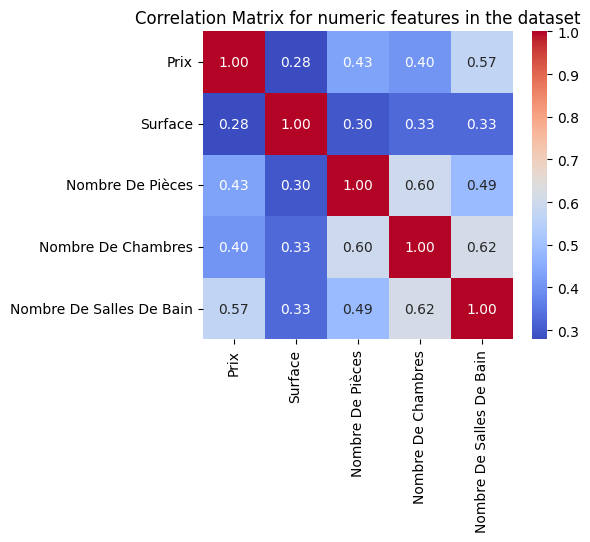

In [13]:
correlation_matrix = new_df.corr()

plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for numeric features in the dataset')
plt.show()


We notice a high positive correlation(+0.57) between the 'Nombres De Salles De Bain' and 'Prix' (price) variables. This suggests their relationship, but it doesn't guarantee that one variable effectively explains the other in a predictive context. We will be performing linear regression analysis between these attributes to identify factors influencing house rental prices.

Additionally, there is a notable positive correlation observed among the variables 'Nombre De Pièces' 'Nombre De Chambres' and 'Nombre De Salles De Bain' (+0.62, +0.6, +0.49). This robust correlation suggests a high degree of interrelation among these variables.

(0.0, 25000.0)

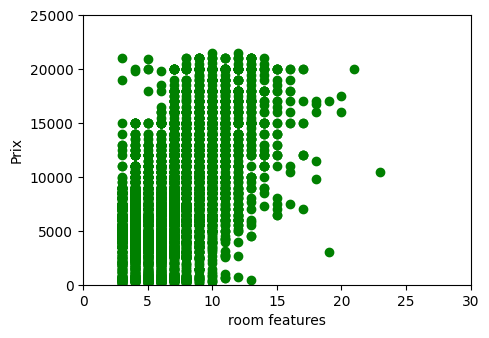

In [15]:
room_attrs = df['Nombre De Pièces']+df['Nombre De Chambres']+ df['Nombre De Salles De Bain']
plt.figure(figsize=(5,3.5))
plt.scatter(room_attrs ,df['Prix'] ,color='green', label='Training Data')
plt.xlabel("room features")
plt.ylabel('Prix')
plt.xlim(0, 30)
plt.ylim(0, 25000)

In [16]:
features1 = df.drop(columns = ["Etat De Location","Prix", "Surface","Étage", "Nombre De Pièces", "Nombre De Chambres", "Nombre De Salles De Bain", "Ville_agadir", "Ville_bouskoura","Ville_casablanca","Ville_dar-bouazza","Ville_kénitra","Ville_marrakech","Ville_mohammedia","Ville_rabat","Ville_salé","Ville_tanger"])

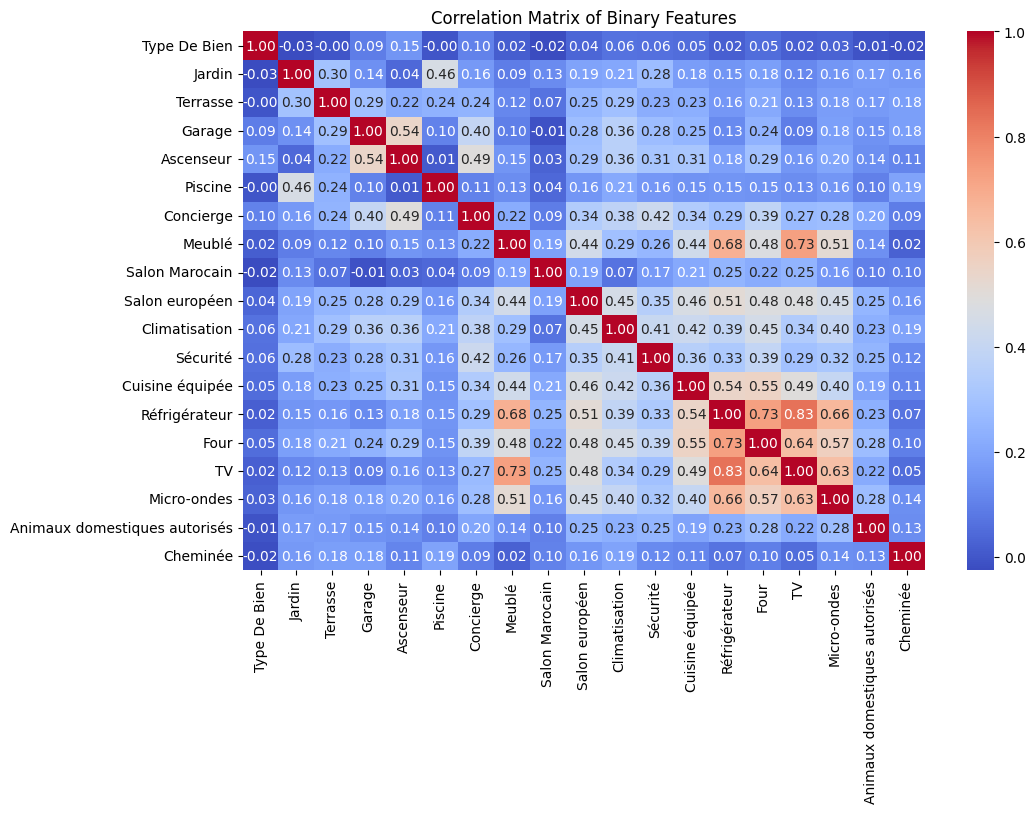

In [17]:
# We use the Pearson Correlation method for the binary attributes
corr_matrix = features1.corr(method='pearson')
plt.figure(figsize=(11, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',xticklabels=features1.columns, yticklabels=features1.columns)
plt.title('Correlation Matrix of Binary Features')
plt.show()

We have identified strong correlations among 'TV' 'Réfrigérateur' 'Four' 'Micro-ondes' and 'Meublé' attributes. Despite the interrelatedness of these features, each contributes unique information to our rental house price prediction model. Therefore, we have decided to retain all of these features in our analysis.

#### Features selection:

Explained variance ratio: [0.17216715 0.08720824 0.06748379 0.05067491 0.03914142]


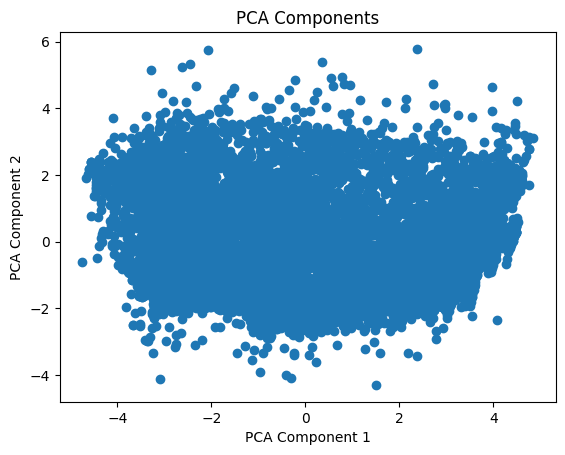

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['Prix']) 

# Standardize the features by scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=5)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PCA_Component_1', 'PCA_Component_2', 'PCA_Component_3','PCA_Component_4','PCA_Component_5'])

# Concatenate the PCA components with the target variable (if applicable)

df_final = pd.concat([df_pca, df['Prix']], axis=1)
# Use df_final for further analysis or visualization

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_var_ratio}")

# If you want to visualize the PCA components (2 components for example)
plt.scatter(df_pca['PCA_Component_1'], df_pca['PCA_Component_3'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')
plt.show()


After changing the number of PCA components multiple times, the "Explained variance ratio" still not enough, so PCA may not work for our case. 

So, we'll work with all features in our dataframe when applying ML algorithms.

In [19]:
df.to_csv('Mubawab_Rental_Data_Transformed_&_Preprocessed_&_Explored.csv', index=False)